In [5]:
import pandas as pd
import numpy as np

In [16]:
promotedContent = pd.read_csv("promoted_content.csv")
totalLen = len(promotedContent)
advDict = dict()
for i in range(totalLen):
    adversiterID = promotedContent.loc[i]["advertiser_id"]
    if adversiterID not in advDict:
        advDict[adversiterID] = 1
    else:
        advDict[adversiterID] += 1

In [17]:
import operator
newadvDict = dict(sorted(advDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:20])
print newadvDict

{2656: 9217, 2848: 7814, 1634: 10552, 1635: 15450, 1510: 4728, 201: 6369, 266: 16529, 2754: 7971, 2030: 6221, 1378: 4709, 3922: 10046, 3829: 14844, 1206: 8774, 2057: 5078, 185: 6391, 2874: 9024, 283: 5592, 2556: 6436, 2110: 6650, 415: 4985}


In [4]:
documentsMeta = pd.read_csv("documents_meta.csv")
event = pd.read_csv("events.csv")

C:\Users\Stan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# do not need for now
eventPartial = event[0:195917]
eventPartialLength = len(eventPartial)
dis2Doc = dict()
for i in range(eventPartialLength):
    dis2Doc[eventPartial.loc[i]["display_id"]] = eventPartial.loc[i]["document_id"]

In [6]:
# get portion of train and test from train_clicks
import pandas as pd
import numpy as np
trainLoad = pd.read_csv("clicks_train.csv")
testLoad = pd.read_csv("clicks_test.csv")

In [7]:
import random
desiredIndices = random.sample(range(1, 16874594), 100000)
desiredIndices.sort()

In [8]:
def binarySearch(aList, item):
    first = 0
    last = len(aList) - 1
    found = False
    
    while first <= last and not found:
        midpoint = (first + last)//2
        if aList[midpoint] == item:
            found = True
        else:
            if item < aList[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    
    temp = midpoint - 1
    previousCheck = True
    while previousCheck:
        if aList[temp] == item:
            midpoint -= 1
            temp -= 1
        else:
            previousCheck = False
    
    return midpoint

In [9]:
newTrainClicked = []
newTrainDisplayID = []
newTrainAdId = []
iterator = 0
for i in range(len(desiredIndices)):
    desiredIndex = binarySearch(trainLoad['display_id'], desiredIndices[i])
    
    tempIndex = desiredIndex
    while tempIndex < len(trainLoad['display_id']):
        if trainLoad.loc[tempIndex]['display_id'] != trainLoad.loc[desiredIndex]['display_id']:
            break
        newTrainClicked.append(trainLoad.loc[tempIndex]['clicked'])
        newTrainDisplayID.append(trainLoad.loc[tempIndex]['display_id'])
        newTrainAdId.append(trainLoad.loc[tempIndex]['ad_id'])
        tempIndex += 1

In [ ]:
# get number of points in trainLoad
# randomly selected 100000 points between [0,... len(trainLoad)] and store it in randomIndex
# store each trainLOad[randomIndex] into train

In [10]:
tempDisplayID = pd.Series(newTrainDisplayID)
df = tempDisplayID.to_frame(name='display_id')
df['ad_id'] = pd.Series(newTrainAdId)
df['clicked'] = pd.Series(newTrainClicked)
# print(df)

In [13]:
train = df[0:300002]
test = df[300002:300002+60004]
# print test

In [14]:
# make dictionary for train and test which make ad_id to click
lenTrain = len(train)
lenTest = len(test)
ad2ClickTrain = dict()
ad2ClickTest = dict()
# for train data
for i in range(lenTrain):
    adID = train.loc[i]["ad_id"]
    clickID = train.loc[i]["clicked"]
    if adID not in ad2ClickTrain:
        ad2ClickTrain[adID] = clickID
    else:
        ad2ClickTrain[adID] += clickID

# for test data
for i in range(lenTest):
    adIDTest = test.loc[i+300002]["ad_id"]
    clickIDTest = test.loc[i+300002]["clicked"]
    if adIDTest not in ad2ClickTest:
        ad2ClickTest[adIDTest] = clickIDTest
    else:
        ad2ClickTest[adIDTest] += clickIDTest
    

In [18]:
# get dict from campaign_id and advertise_id ad_id(features)
totalLen = len(promotedContent)
ad2Adv = dict()
ad2Cam = dict()
for i in range(totalLen):
    adID = promotedContent.loc[i]["ad_id"]
    advID = promotedContent.loc[i]["advertiser_id"]
    camID = promotedContent.loc[i]["campaign_id"]
    ad2Adv[adID] = advID
    ad2Cam[adID] = camID

In [20]:
# make new dictionary on campaign_id and advertise_id which gets clicked
cam2Click = dict()
adv2Click = dict()
for each in ad2ClickTrain:
    adID = each
    adv = ad2Adv[adID]
    if adv not in adv2Click:
        adv2Click[adv] = ad2ClickTrain[adID]
    else:
        adv2Click[adv] += ad2ClickTrain[adID]
        
    cam = ad2Cam[adID]
    if cam not in cam2Click:
        cam2Click[cam] = ad2ClickTrain[adID]
    else:
        cam2Click[cam] += ad2ClickTrain[adID]

In [21]:
print len(adv2Click)
print len(cam2Click)

2862
14531


In [22]:
import operator
# get top 50 features for both adv and cam and create a feature theta dictionary for training later
topAdvFeature = dict(sorted(adv2Click.iteritems(), key=operator.itemgetter(1), reverse=True)[:2856])
topCamFeature = dict(sorted(cam2Click.iteritems(), key=operator.itemgetter(1), reverse=True)[:14478])
# print max(topCamFeature.values())
# print max(topAdvFeature.values())
thetaAdvDict = dict()
thetaCamDict = dict()
topAdvFeatureKeys = topAdvFeature.keys()
topCamFeatureKeys = topCamFeature.keys()
for i in range(len(topAdvFeatureKeys)):
    thetaAdvDict[topAdvFeatureKeys[i]] = 0
for i in range(len(topCamFeatureKeys)):
    thetaCamDict[topCamFeatureKeys[i]] = 0

In [23]:
import math

In [ ]:
# implement logistic regression based on selected top 50 features
totalItr = 10
trainLen = len(train)
eta = 0.1 # step size
for itr in range(totalItr):
    for i in range(trainLen):
        y = train.loc[i]["clicked"] # clicked is 1, else is 0
        # use y = 1 and -1 to run logistic regression
        if y == 0:
            y = -1
        adID = train.loc[i]['ad_id']
        adv = ad2Adv[adID]
        cam = ad2Cam[adID]
        
        # update thetaAdvDict for adv, x is 1 which is indicator of feature
        if adv in topAdvFeature:
            if thetaAdvDict[adv] > 20 and y == -1:
                hTheta = 0
            else:
                hTheta = (1/(1+math.exp(-y*thetaAdvDict[adv]*1)))
            JDerivative = (hTheta - 1)*(y*1)
            thetaAdvDict[adv] -= eta*JDerivative
        # update thetaCamDict for cam
        if cam in topCamFeature:
            if thetaCamDict[cam] > 20 and y == -1:
                hTheta = 0
            else: 
                hTheta = (1/(1+math.exp(-y*thetaCamDict[cam]*1)))
            JDerivative = (hTheta - 1)*(y*1)
            thetaCamDict[cam] -= eta*JDerivative


In [3]:
# # five iteration result
# print thetaAdvDict
# print ''
# print topAdvFeature
# print ''
# print thetaCamDict
# print ''
# print topCamFeature

In [ ]:
# make prediction
from copy import deepcopy
import random
testResult = deepcopy(test)
testLen = len(testResult)
for i in range(0,testLen):
    testResult.set_value(i+300002, 'clicked', 0)
    
displayID = testResult.loc[300002+0]["display_id"]
maxHypo = 0
maxset = []

for i in range(0,testLen):
    if displayID == testResult.loc[300002+i]["display_id"]:
        # the same displayID
        adID = testResult.loc[300002+i]['ad_id']
        adv = ad2Adv[adID]
        cam = ad2Cam[adID]
        if adv in thetaAdvDict:
            thetaAdv = thetaAdvDict[adv]
            hypoAdv = 1/(1+math.exp(-thetaAdv*1))
        else:
            hypoAdv = 0
        if cam in thetaCamDict:
            thetaCam = thetaCamDict[cam]
            hypoCam = 1/(1+math.exp(-thetaCam*1))
        else:
            hypoCam = 0
        Hypo = hypoAdv + hypoCam
        if Hypo > maxHypo:
            maxHypo = Hypo
            maxset = []
            maxset.append((300002+i, adID))
        elif Hypo == maxHypo:
            maxset.append((300002+i, adID))
    else:
        # make prediction
        if len(maxset) == 1:
            maxvalue = maxset[0]
            index = maxvalue[0]
        else:
            maxvalue = random.sample(maxset, 1)
            index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)
        # Start the next
        maxHypo = 0
        adID = testResult.loc[300002+i]['ad_id']
        adv = ad2Adv[adID]
        cam = ad2Cam[adID]
        if adv in thetaAdvDict:
            thetaAdv = thetaAdvDict[adv]
            hypoAdv = 1/(1+math.exp(-thetaAdv*1))
        else:
            hypoAdv = 0
        if cam in thetaCamDict:
            thetaCam = thetaCamDict[cam]
            hypoCam = 1/(1+math.exp(-thetaCam*1))
        else:
            hypoCam = 0
        maxHypo = hypoAdv + hypoCam
        maxset = []
        maxset.append((300002+i, adID))
        displayID = testResult.loc[300002+i]["display_id"]
            
    if i == testLen-1:
        if len(maxset) == 1:
            maxvalue = maxset[0]
            index = maxvalue[0]
        else:
            maxvalue = random.sample(maxset, 1)
            index = maxvalue[0][0]
        testResult.set_value(index, 'clicked', 1)
        
            

In [1]:
# print testResult

In [2]:
# print test

In [ ]:
# print out percenrage
displayID = testResult.loc[300002+0]["display_id"]
totalCount = 0
count = 0
for i in range(testLen):
    if testResult.loc[300002+i]["clicked"] == test.loc[300002+i]["clicked"] and test.loc[300002+i]["clicked"] == 1:
        count += 1
    if displayID != testResult.loc[300002+i]["display_id"]:
        totalCount += 1
        displayID = testResult.loc[300002+i]["display_id"]
print float(count)/float(totalCount)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

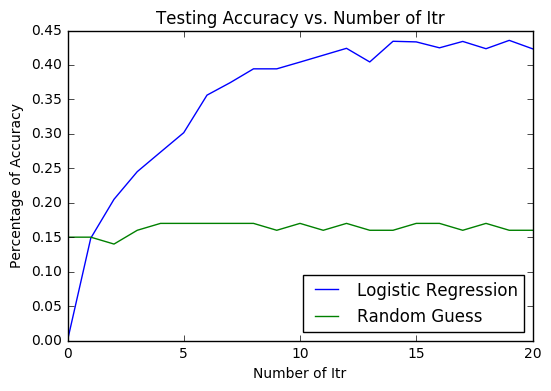

In [3]:
# make plot for poster
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y = [0, 0.1484909, 0.2049698, 0.2450905, 0.273440, 0.3016700, 0.3561667, 0.3743460, 0.3943460, 0.3943460, 
     0.4041342, 0.4141341, 0.4241324, 0.4043456, 0.434345, 0.433456, 0.4248578, 0.4341334, 0.423567, 0.4356795, 0.423464]
yGuess = [0.15, 0.15, 0.14, 0.16, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.17, 0.16, 0.17, 0.16, 0.16, 0.17, 0.17, 0.16, 
          0.17, 0.16, 0.16]
xArray = np.array(x, np.int32)
yArray = np.array(y, np.float)
yGuessArray = np.array(yGuess, np.float)
plt.plot(xArray, yArray, label='Logistic Regression')
plt.plot(xArray, yGuessArray, label='Random Guess')
plt.legend(loc='lower right')
plt.xlabel('Number of Itr')
plt.ylabel('Percentage of Accuracy')
plt.title('Testing Accuracy vs. Number of Itr')
plt.show()